In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd
#한글 폰트 설정
path = 'C:\\Windows\\Fonts\\HYKANM.TTF'
font = font_manager.FontProperties(fname=path).get_name()
plt.rc('font',family=font)

In [2]:
file_name = "./남녀연령별인구현황.csv"
data = pd.read_csv(file_name,encoding="EUC-KR")
data.head()

,행정구역,2024년11월_남_총인구수,2024년11월_남_연령구간인구수,2024년11월_남_0~9세,2024년11월_남_10~19세,2024년11월_남_20~29세,2024년11월_남_30~39세,2024년11월_남_40~49세,2024년11월_남_50~59세,2024년11월_남_60~69세,...,2024년11월_여_10~19세,2024년11월_여_20~29세,2024년11월_여_30~39세,2024년11월_여_40~49세,2024년11월_여_50~59세,2024년11월_여_60~69세,2024년11월_여_70~79세,2024년11월_여_80~89세,2024년11월_여_90~99세,2024년11월_여_100세 이상
0,서울특별시 (1100000000),"4,507,664","4,507,664","248,988","369,160","618,386","721,116","685,509","731,718","626,930",...,"352,556","694,359","719,488","702,180","755,916","697,519","421,988","210,459","35,681","1,151"
1,서울특별시 종로구 (1111000000),"66,673","66,673","2,829","4,617","9,887","9,787","8,999","11,544","10,508",...,"4,813","11,173","9,908","9,599","11,869","10,508","6,439","4,100",745,28
2,서울특별시 종로구 청운효자동(1111051500),"5,045","5,045",290,513,656,690,768,859,640,...,503,673,829,"1,006","1,031",793,539,330,63,1
3,서울특별시 종로구 사직동(1111053000),"3,978","3,978",206,265,428,635,613,682,588,...,361,613,803,800,777,691,416,299,58,3
4,서울특별시 종로구 삼청동(1111054000),"1,067","1,067",38,93,121,130,153,158,186,...,64,118,159,155,175,195,134,88,20,0


In [3]:
region_name = input("검색하고 싶은 지역명을 입력하세요 : ")
data = data.rename(columns={"행정구역":"지역명"})
age_columns = [col for col in data.columns if "세" in col ]

검색하고 싶은 지역명을 입력하세요 :  용산


In [5]:
for col in age_columns:
    data[col] = data[col].astype(str).str.replace(",","").astype(int)

In [6]:
region_data = data[data["지역명"].str.contains(region_name,na=False)]

if region_data.empty:
    print(f"{region_name}의 지역은 데이터가 존재하지 않습니다.")

In [16]:
male_col = [ col for col in region_data.columns if "남" in col and "세" in col]
female_col = [ col for col in region_data.columns if "여" in col and "세" in col]

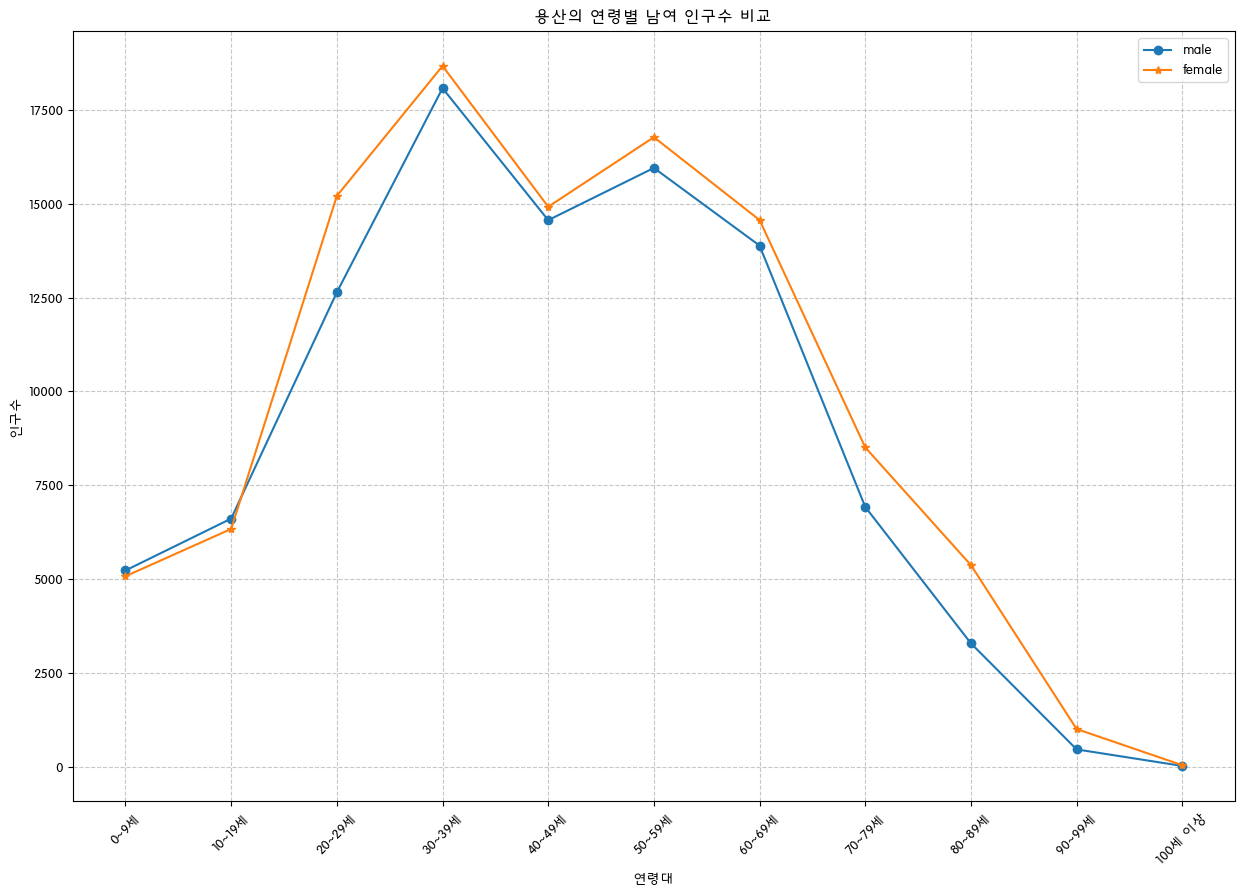

In [29]:
# 데이터 추출
male_age_groups = [ col.split("_남_")[1] for col in male_col ]
male_result = region_data[male_col].iloc[0].values

female_age_groups = [ col.split("_여_")[1] for col in female_col ]
female_result = region_data[female_col].iloc[0].values

# 그래프 그리기
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.plot(male_age_groups,male_result,marker='o',label='male')
plt.plot(female_age_groups,female_result,marker='*',label='female')
plt.title(f"{region_name}의 연령별 남여 인구수 비교")
plt.xlabel("연령대")
plt.ylabel("인구수")
plt.grid(True,linestyle='--',alpha=0.7)
plt.legend()